
🚀 Training new model with learning rate: 0.5
Iteration 0, Loss: 0.164893
✅ Early stop at iteration 835


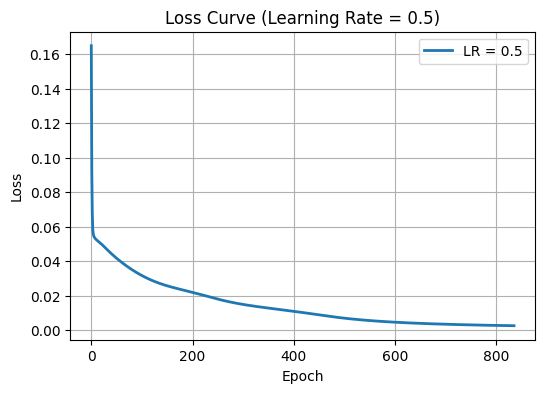

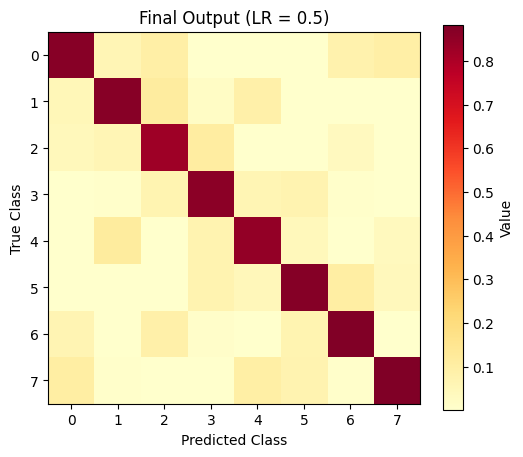


🚀 Training new model with learning rate: 0.1
Iteration 0, Loss: 0.164889
Iteration 2000, Loss: 0.028723
Iteration 4000, Loss: 0.022984
Iteration 6000, Loss: 0.007569
Iteration 8000, Loss: 0.002542
✅ Early stop at iteration 8051


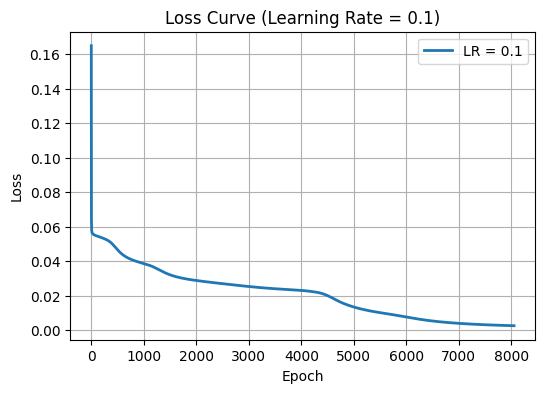

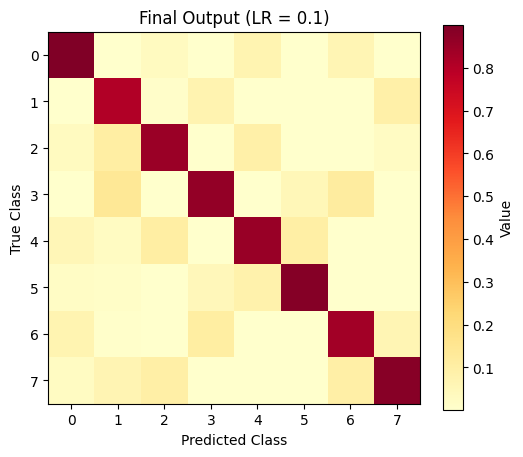


🚀 Training new model with learning rate: 0.05
Iteration 0, Loss: 0.115957
Iteration 2000, Loss: 0.015070
Iteration 4000, Loss: 0.005002
Iteration 6000, Loss: 0.002728
✅ Early stop at iteration 6382


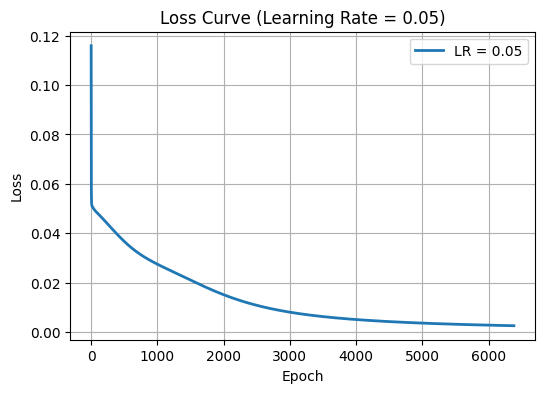

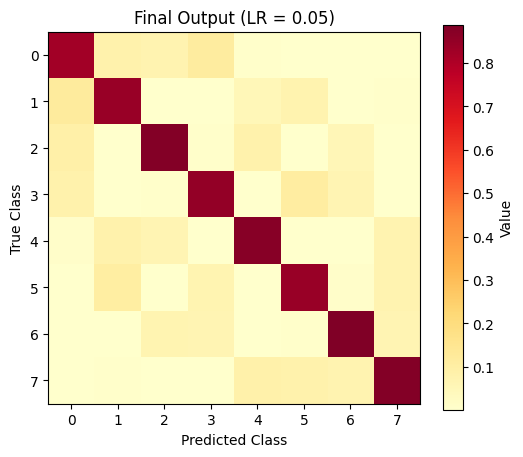


🚀 Training new model with learning rate: 0.01
Iteration 0, Loss: 0.146974
Iteration 2000, Loss: 0.049928
Iteration 4000, Loss: 0.043699
Iteration 6000, Loss: 0.038473
Iteration 8000, Loss: 0.034943
Iteration 10000, Loss: 0.032626
Iteration 12000, Loss: 0.030973
Iteration 14000, Loss: 0.029645
Iteration 16000, Loss: 0.028526
Iteration 18000, Loss: 0.027572
Iteration 20000, Loss: 0.026753
Iteration 22000, Loss: 0.026037
Iteration 24000, Loss: 0.025399
Iteration 26000, Loss: 0.024824
Iteration 28000, Loss: 0.024302
Iteration 30000, Loss: 0.023831
Iteration 32000, Loss: 0.023406
Iteration 34000, Loss: 0.023019
Iteration 36000, Loss: 0.022667
Iteration 38000, Loss: 0.022344
Iteration 40000, Loss: 0.022046
Iteration 42000, Loss: 0.021772
Iteration 44000, Loss: 0.021517
Iteration 46000, Loss: 0.021282
Iteration 48000, Loss: 0.021064
Iteration 50000, Loss: 0.020862
Iteration 52000, Loss: 0.020676
Iteration 54000, Loss: 0.020502
Iteration 56000, Loss: 0.020341
Iteration 58000, Loss: 0.020190
I

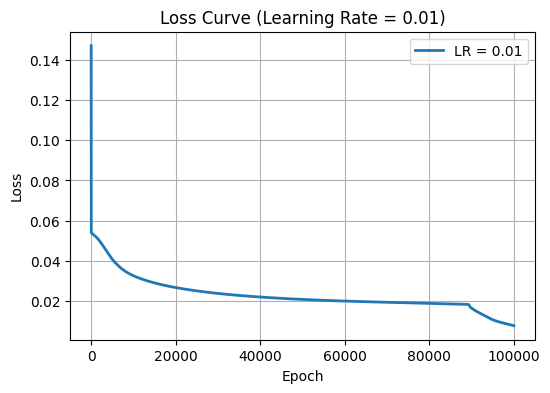

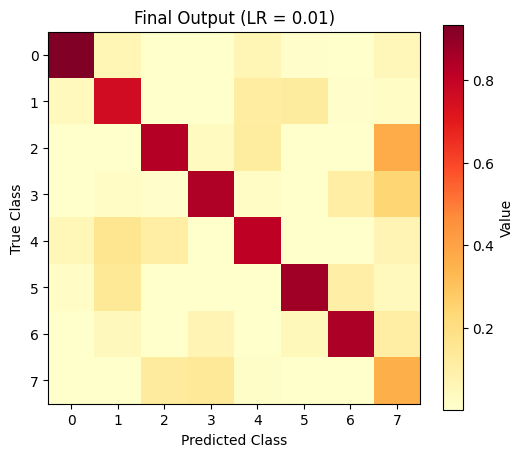


🚀 Training new model with learning rate: 0.005
Iteration 0, Loss: 0.182162
Iteration 2000, Loss: 0.053887
Iteration 4000, Loss: 0.052610
Iteration 6000, Loss: 0.051233
Iteration 8000, Loss: 0.049907
Iteration 10000, Loss: 0.048807
Iteration 12000, Loss: 0.047971
Iteration 14000, Loss: 0.047335
Iteration 16000, Loss: 0.046826
Iteration 18000, Loss: 0.046396
Iteration 20000, Loss: 0.046020
Iteration 22000, Loss: 0.045684
Iteration 24000, Loss: 0.045384
Iteration 26000, Loss: 0.045116
Iteration 28000, Loss: 0.044878
Iteration 30000, Loss: 0.044666
Iteration 32000, Loss: 0.044479
Iteration 34000, Loss: 0.044312
Iteration 36000, Loss: 0.044160
Iteration 38000, Loss: 0.043084
Iteration 40000, Loss: 0.040892
Iteration 42000, Loss: 0.038546
Iteration 44000, Loss: 0.036387
Iteration 46000, Loss: 0.034629
Iteration 48000, Loss: 0.033244
Iteration 50000, Loss: 0.032138
Iteration 52000, Loss: 0.031232
Iteration 54000, Loss: 0.030470
Iteration 56000, Loss: 0.029809
Iteration 58000, Loss: 0.029220


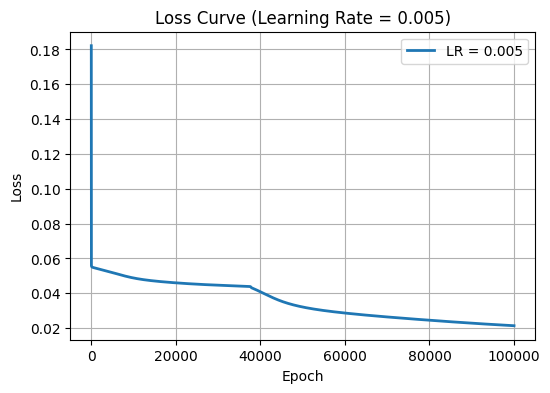

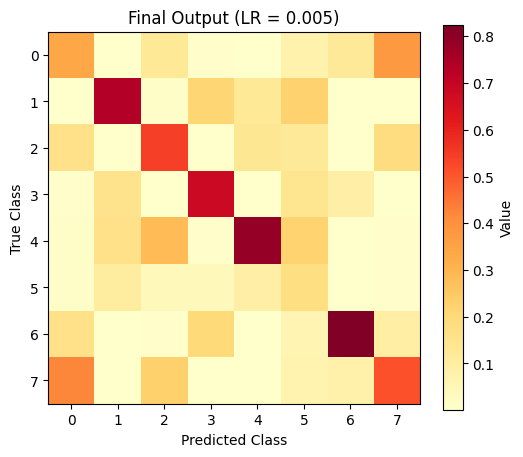

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# --- Neural Network Class ---
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, X):
        self.hidden_output = self.sigmoid(X.dot(self.W1) + self.b1)
        self.output = self.sigmoid(self.hidden_output.dot(self.W2) + self.b2)
        return self.output
    
    def backward(self, X, Y, lr):
        output_error = Y - self.output
        output_delta = output_error * (self.output * (1 - self.output))
        hidden_error = output_delta.dot(self.W2.T)
        hidden_delta = hidden_error * (self.hidden_output * (1 - self.hidden_output))
        self.W2 += lr * self.hidden_output.T.dot(output_delta)
        self.b2 += np.sum(output_delta, axis=0)
        self.W1 += lr * X.T.dot(hidden_delta)
        self.b1 += np.sum(hidden_delta, axis=0)
        return np.mean(0.5 * (Y - self.output) ** 2)


# --- Plotting Class ---
class Plotter:
    def __init__(self, cmap='YlOrRd'):
        self.cmap = cmap
    
    def plot_heatmap(self, matrix, title='Heatmap of Model Output Matrix'):
        plt.figure(figsize=(6, 5))
        plt.imshow(matrix, cmap=self.cmap, interpolation='nearest')
        plt.colorbar(label='Value')
        plt.title(title)
        plt.xlabel('Predicted Class')
        plt.ylabel('True Class')
        plt.show()


# --- Trainer Class ---
class Trainer:
    def __init__(self, input_size, hidden_size, output_size, plotter, lr_list):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.plotter = plotter
        self.lr_list = lr_list

    def train(self, X, Y, epochs=100000, early_stop_loss=0.0025):
        for lr in self.lr_list:
            print(f"\n🚀 Training new model with learning rate: {lr}")
            nn = NeuralNetwork(self.input_size, self.hidden_size, self.output_size)
            loss_list = []

            for i in range(epochs):
                nn.forward(X)
                loss = nn.backward(X, Y, lr)
                loss_list.append(loss)

                if i % 2000 == 0:
                    print(f"Iteration {i}, Loss: {loss:.6f}")

                # Stop early if converged
                if loss < early_stop_loss:
                    print(f"✅ Early stop at iteration {i}")
                    break

            # Final forward pass
            final_output = nn.forward(X)

            # Plot loss curve for this learning rate
            plt.figure(figsize=(6, 4))
            plt.plot(loss_list, label=f"LR = {lr}", linewidth=2)
            plt.title(f"Loss Curve (Learning Rate = {lr})")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.legend()
            plt.grid(True)
            plt.show()

            # Plot final heatmap
            self.plotter.plot_heatmap(final_output, title=f"Final Output (LR = {lr})")


# --- Example usage ---

x = np.eye(8)  # 8x8 identity matrix
x_array = np.array(x)
Y = x_array
lr_list = [0.5, 0.1, 0.05, 0.01, 0.005]

plotter = Plotter()
trainer = Trainer(input_size=8, hidden_size=3, output_size=8, plotter=plotter, lr_list=lr_list)
trainer.train(x_array, Y)
